In [11]:
import pandas as pd
from pathlib import Path

data_path = Path('C:/Users/prakh/Desktop/Immersivify Project/movie-rating-prediction/data/IMDb Movies India.csv')

# Attempt reading the CSV with a different encoding
try:
    df = pd.read_csv(data_path, encoding='ISO-8859-1')
    display(df.head())
except UnicodeDecodeError as e:
    print("ISO-8859-1 encoding did not work. Error details:")
    print(e)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [12]:
# 1. DataFrame Dimensions
print("DataFrame Shape (rows, columns):", df.shape)

# 2. Column Info (data types, non-null counts, etc.)
print("\nDataFrame Info:")
df.info()

# 3. Quick Look at Missing Values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


DataFrame Shape (rows, columns): (15509, 10)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB

Missing Values in Each Column:
Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [13]:
# Let's look at some random samples to understand how these columns are formatted
import random

# Set a seed for reproducibility (optional)
random.seed(42)

print("=== Year Column Sample ===")
sample_year = df['Year'].dropna().sample(10)  # sample 10 non-null entries
display(sample_year)

print("\n=== Duration Column Sample ===")
sample_duration = df['Duration'].dropna().sample(10)  # sample 10 non-null entries
display(sample_duration)

print("\n=== Votes Column Sample ===")
sample_votes = df['Votes'].dropna().sample(10)  # sample 10 non-null entries
display(sample_votes)


=== Year Column Sample ===


11338    (1957)
12098    (2015)
12980    (2020)
5034     (1947)
1137     (2000)
11970    (2019)
13320    (2000)
6324     (2008)
12311    (1996)
9958     (1952)
Name: Year, dtype: object


=== Duration Column Sample ===


12590    132 min
5952     105 min
7019     138 min
9574     119 min
275      116 min
15072    145 min
4396     140 min
4836     154 min
2071     165 min
13266    160 min
Name: Duration, dtype: object


=== Votes Column Sample ===


5563      3,047
7352         37
7726         16
7564      7,726
8244         12
13665        13
1772         17
10595     2,921
6950     24,942
10657        26
Name: Votes, dtype: object

In [14]:
import numpy as np

# Make a copy of the dataframe to keep track of changes
df_clean = df.copy()

# 1. Clean 'Year' column
#    - Remove parentheses and any leading/trailing spaces, then convert to integer if possible.
df_clean['Year'] = (
    df_clean['Year']
    .astype(str)                 # Convert to string in case it's not already
    .str.replace('(', '', regex=False)  # Remove '('
    .str.replace(')', '', regex=False)  # Remove ')'
    .str.strip()                 # Remove extra spaces
)

# Attempt to convert to numeric (coercing errors to NaN if not convertible)
df_clean['Year'] = pd.to_numeric(df_clean['Year'], errors='coerce')

# 2. Clean 'Duration' column
#    - Remove "min", strip spaces, convert to integer if possible.
df_clean['Duration'] = (
    df_clean['Duration']
    .astype(str)
    .str.replace('min', '', regex=False)
    .str.strip()
)

# Convert to numeric (duration in minutes). Non-convertible values become NaN.
df_clean['Duration'] = pd.to_numeric(df_clean['Duration'], errors='coerce')

# 3. Clean 'Votes' column
#    - Remove commas, strip spaces, convert to integer if possible.
df_clean['Votes'] = (
    df_clean['Votes']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.strip()
)

# Convert to numeric
df_clean['Votes'] = pd.to_numeric(df_clean['Votes'], errors='coerce')

# Display the first few rows to confirm changes
df_clean.head(10)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90.0,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105.0,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,1997.0,147.0,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005.0,142.0,"Drama, Romance, War",7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,2008.0,59.0,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,2012.0,82.0,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,2014.0,116.0,"Action, Crime, Thriller",4.0,11.0,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [15]:
print("=== df_clean Data Types ===")
df_clean.info()

print("\n=== Missing Values After Cleaning ===")
print(df_clean.isnull().sum())


=== df_clean Data Types ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   float64
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7919 non-null   float64
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(4), object(6)
memory usage: 1.2+ MB

=== Missing Values After Cleaning ===
Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7590
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [16]:
# 1. Create another copy to keep track of changes
df_model = df_clean.copy()

# 2. Drop rows where 'Rating' is missing
df_model = df_model.dropna(subset=['Rating'])

# 3. Check how many rows remain
print("Shape after dropping rows with missing Rating:", df_model.shape)

# 4. Check missing values again
print("\nMissing values after dropping rows with missing Rating:")
print(df_model.isnull().sum())


Shape after dropping rows with missing Rating: (7919, 10)

Missing values after dropping rows with missing Rating:
Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64


In [17]:
# Make a copy to track changes
df_final = df_model.copy()

# 1. Impute Duration with median
median_duration = df_final['Duration'].median()
df_final['Duration'].fillna(median_duration, inplace=True)

# 2. Fill missing values in categorical columns with "Unknown"
categorical_cols = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
for col in categorical_cols:
    df_final[col].fillna('Unknown', inplace=True)

# Check the result
print("Missing values after imputation/filling:")
print(df_final.isnull().sum())
print("\nSample rows to verify:")
display(df_final.head(10))


Missing values after imputation/filling:
Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

Sample rows to verify:


C:\Users\prakh\AppData\Local\Temp\ipykernel_28604\2755482879.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['Duration'].fillna(median_duration, inplace=True)
C:\Users\prakh\AppData\Local\Temp\ipykernel_28604\2755482879.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997.0,147.0,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005.0,142.0,"Drama, Romance, War",7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012.0,82.0,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,2014.0,116.0,"Action, Crime, Thriller",4.0,11.0,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,2004.0,96.0,Drama,6.2,17.0,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,2016.0,120.0,Horror,5.9,59.0,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,1991.0,161.0,"Horror, Romance, Thriller",6.5,983.0,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,2012.0,166.0,"Comedy, Drama, Romance",5.7,512.0,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


In [18]:
import numpy as np

df_final.describe()


,Year,Duration,Rating,Votes
count,7919.000000,7919.000000,7919.000000,7919.000000
mean,1993.321758,132.739866,5.841621,1938.520394
std,20.463770,22.838302,1.381777,11602.415952
min,1917.000000,21.000000,1.100000,5.000000
25%,1979.500000,124.000000,4.900000,16.000000
50%,1997.000000,134.000000,6.000000,55.000000
75%,2011.000000,143.000000,6.800000,404.000000
max,2021.000000,321.000000,10.000000,591417.000000


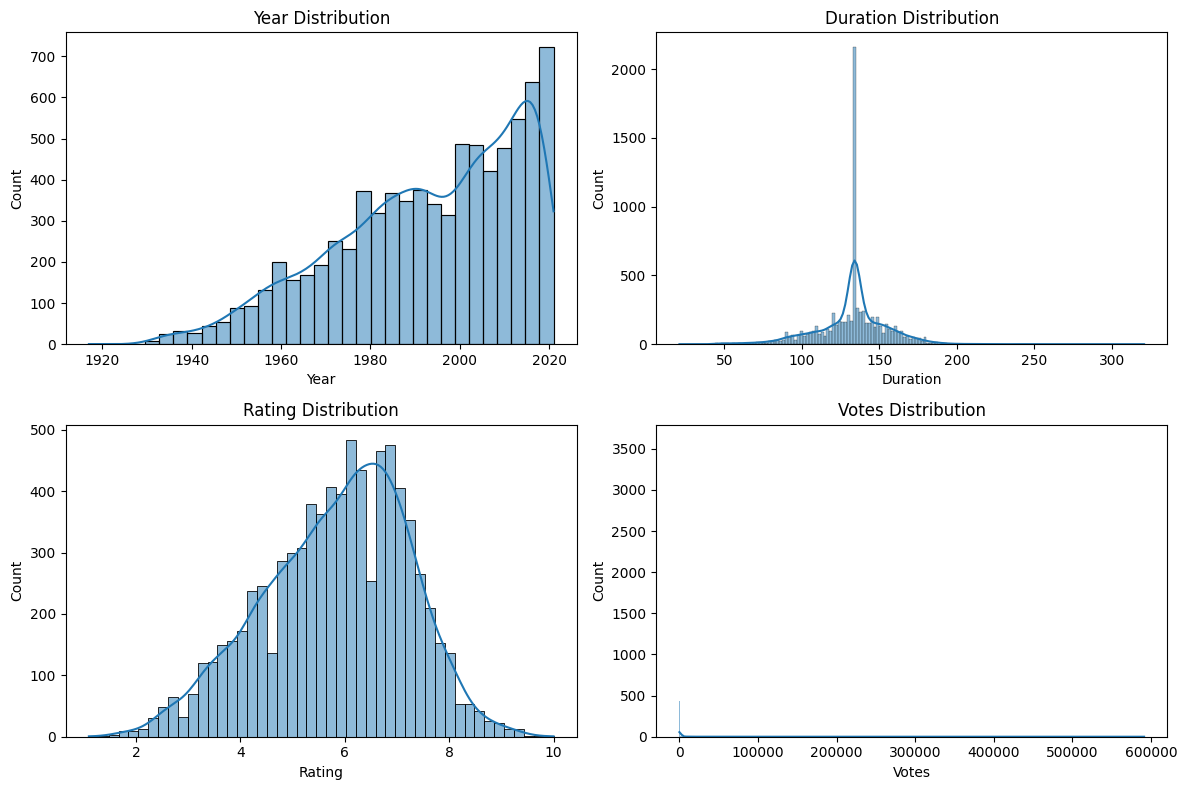

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns
numeric_cols = ['Year', 'Duration', 'Rating', 'Votes']

# Create histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(data=df_final, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()


Top 10 Genres by Frequency:


,count
Drama,4924
Action,2358
Romance,1781
Comedy,1609
Crime,1111
Thriller,876
Family,663
Musical,498
Adventure,386
Mystery,370


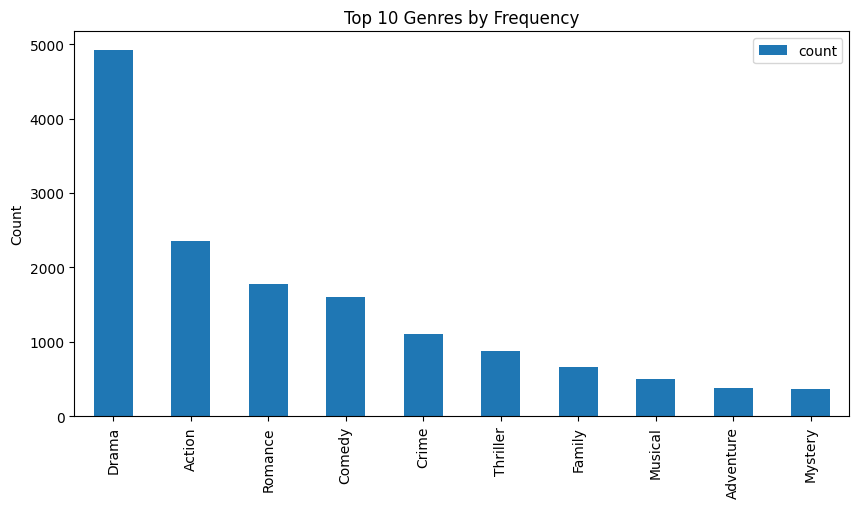

In [20]:
from collections import Counter

# Split genre strings and count frequencies
genre_counts = Counter()

for g in df_final['Genre']:
    # Split on comma, strip spaces
    for sub_g in g.split(','):
        sub_g = sub_g.strip()
        genre_counts[sub_g] += 1

# Convert to a DataFrame for easy sorting/plotting
genre_freq = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['count'])
genre_freq.sort_values('count', ascending=False, inplace=True)

# Display the top 10 genres
print("Top 10 Genres by Frequency:")
display(genre_freq.head(10))

# Plot the top 10 genres
genre_freq.head(10).plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Genres by Frequency")
plt.ylabel("Count")
plt.show()


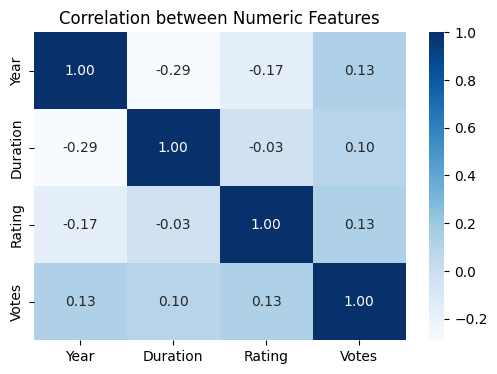

In [21]:
# Compute correlation among numeric features
corr = df_final[['Year', 'Duration', 'Rating', 'Votes']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.title("Correlation between Numeric Features")
plt.show()


In [22]:
import numpy as np

# Create a working copy for feature engineering
df_feat = df_final.copy()

# 1. Log transform 'Votes' to reduce skew
df_feat['Log_Votes'] = np.log1p(df_feat['Votes'])  # log(1 + votes)

# Confirm the new column
df_feat[['Votes', 'Log_Votes']].head(10)


,Votes,Log_Votes
1,8.0,2.197225
3,35.0,3.583519
5,827.0,6.719013
6,1086.0,6.991177
8,326.0,5.789960
9,11.0,2.484907
10,17.0,2.890372
11,59.0,4.094345
12,983.0,6.891626
13,512.0,6.240276


In [23]:
# 2. Create a Decade column
df_feat['Decade'] = (df_feat['Year'] // 10) * 10

# Check the first 10 rows of the new Decade column
df_feat[['Year', 'Decade']].head(10)


,Year,Decade
1,2019.0,2010.0
3,2019.0,2010.0
5,1997.0,1990.0
6,2005.0,2000.0
8,2012.0,2010.0
9,2014.0,2010.0
10,2004.0,2000.0
11,2016.0,2010.0
12,1991.0,1990.0
13,2012.0,2010.0


In [24]:
from sklearn.preprocessing import MultiLabelBinarizer

# 3. Split Genre into a list of genres
df_feat['Genre_List'] = df_feat['Genre'].apply(lambda x: [g.strip() for g in x.split(',')])

# 4. MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genre_dummies = mlb.fit_transform(df_feat['Genre_List'])

# Create a DataFrame from the resulting array
genre_dummies_df = pd.DataFrame(genre_dummies, columns=mlb.classes_, index=df_feat.index)

# 5. Concatenate with df_feat
df_feat = pd.concat([df_feat, genre_dummies_df], axis=1)

# 6. (Optional) Drop Genre_List, as we've already expanded it
df_feat.drop(columns=['Genre_List'], inplace=True)

# 7. Check the new columns
print("New Genre dummy columns added:")
print(mlb.classes_)
df_feat.head(10)


New Genre dummy columns added:
['Action' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime'
 'Documentary' 'Drama' 'Family' 'Fantasy' 'History' 'Horror' 'Music'
 'Musical' 'Mystery' 'News' 'Romance' 'Sci-Fi' 'Sport' 'Thriller'
 'Unknown' 'War' 'Western']


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,...,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,Unknown,War,Western
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,...,0,0,0,0,0,0,0,0,0,0
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,...,0,0,0,1,0,0,0,0,0,0
5,...Aur Pyaar Ho Gaya,1997.0,147.0,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,...,1,0,0,0,0,0,0,0,0,0
6,...Yahaan,2005.0,142.0,"Drama, Romance, War",7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,...,0,0,0,1,0,0,0,0,1,0
8,?: A Question Mark,2012.0,82.0,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,...,0,1,0,0,0,0,1,0,0,0
9,@Andheri,2014.0,116.0,"Action, Crime, Thriller",4.0,11.0,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon,...,0,0,0,0,0,0,1,0,0,0
10,1:1.6 An Ode to Lost Love,2004.0,96.0,Drama,6.2,17.0,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni,...,0,0,0,0,0,0,0,0,0,0
11,1:13:7 Ek Tera Saath,2016.0,120.0,Horror,5.9,59.0,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani,...,0,0,0,0,0,0,0,0,0,0
12,100 Days,1991.0,161.0,"Horror, Romance, Thriller",6.5,983.0,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey,...,0,0,0,1,0,0,1,0,0,0
13,100% Love,2012.0,166.0,"Comedy, Drama, Romance",5.7,512.0,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh,...,0,0,0,1,0,0,0,0,0,0


In [25]:
import pandas as pd
import numpy as np

# We'll continue working with df_feat from the previous step
df_model_data = df_feat.copy()

# 1. Identify all genre columns (dummy columns) by listing them
genre_columns = [
    'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
    'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
    'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
    'Unknown', 'War', 'Western'
]

# 2. Define a features list
feature_cols = [
    'Duration',
    'Log_Votes',
    'Decade'
] + genre_columns  # Concatenate the list of genre columns

# 3. Create X (features) and y (target)
X = df_model_data[feature_cols]
y = df_model_data['Rating']

# Check shapes
print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

# Optional: Display the first 5 rows of X
X.head()


Feature matrix shape: (7919, 26)
Target vector shape: (7919,)


,Duration,Log_Votes,Decade,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,Unknown,War,Western
1,109.0,2.197225,2010.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,110.0,3.583519,2010.0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
5,147.0,6.719013,1990.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
6,142.0,6.991177,2000.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
8,82.0,5.789960,2010.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [26]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (6335, 26)
X_test shape: (1584, 26)
y_train shape: (6335,)
y_test shape: (1584,)


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Create and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 2. Predict on the test set
y_pred = lr_model.predict(X_test)

# 3. Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Baseline Linear Regression Results:")
print(f"  RMSE: {rmse:.3f}")
print(f"  R^2:  {r2:.3f}")


Baseline Linear Regression Results:
  RMSE: 1.187
  R^2:  0.242


In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Instantiate RandomForestRegressor with default params
rf_model = RandomForestRegressor(random_state=42)

# 2. Fit the model
rf_model.fit(X_train, y_train)

# 3. Predict
y_pred_rf = rf_model.predict(X_test)

# 4. Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest (Default Params) Results:")
print(f"  RMSE: {rmse_rf:.3f}")
print(f"  R^2:  {r2_rf:.3f}")


Random Forest (Default Params) Results:
  RMSE: 1.124
  R^2:  0.321


Top 10 Feature Importances:


,Feature,Importance
1,Log_Votes,0.373005
0,Duration,0.191389
2,Decade,0.148067
9,Documentary,0.039899
10,Drama,0.031051
3,Action,0.029388
7,Comedy,0.024508
19,Romance,0.023796
8,Crime,0.020231
14,Horror,0.020182


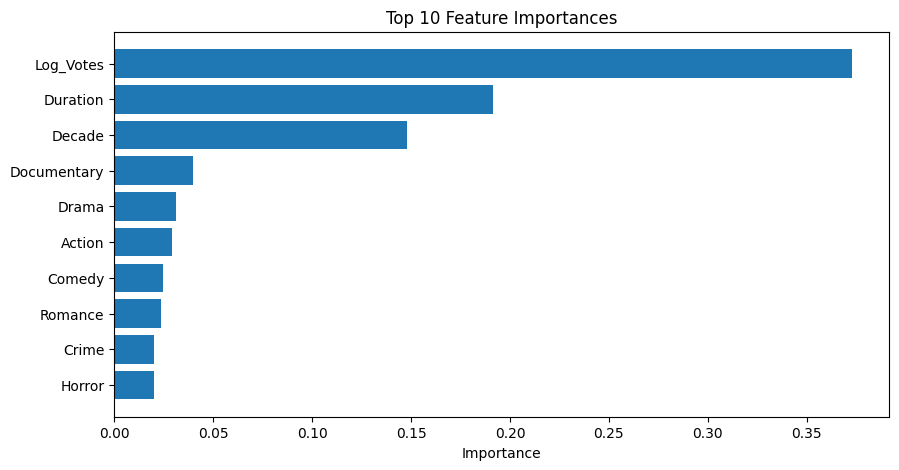

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances from the trained rf_model
importances = rf_model.feature_importances_

# Match each importance to the corresponding column in X
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print the top 10
print("Top 10 Feature Importances:")
display(feature_importance_df.head(10))

# Plot the top 10
plt.figure(figsize=(10,5))
plt.barh(
    feature_importance_df.head(10)['Feature'][::-1], 
    feature_importance_df.head(10)['Importance'][::-1]
)
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.show()


In [30]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define a parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a new RandomForestRegressor
rf_model_tune = RandomForestRegressor(random_state=42)

# Set up RandomizedSearchCV
rand_search = RandomizedSearchCV(
    rf_model_tune, 
    param_distributions=param_dist, 
    n_iter=10,               # Number of parameter settings to try
    cv=3,                    # 3-fold cross-validation
    scoring='neg_mean_squared_error', 
    random_state=42, 
    n_jobs=-1                # Use all available CPU cores
)

# Fit the randomized search on the training data
rand_search.fit(X_train, y_train)

# Print out the best parameters
print("Best Parameters from RandomizedSearchCV:")
print(rand_search.best_params_)

# Evaluate on test set
best_rf_model = rand_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

print("\nPerformance of Best Random Forest on Test Set:")
print(f"  RMSE: {rmse_best:.3f}")
print(f"  R^2:  {r2_best:.3f}")


c:\Users\prakh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
6 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\prakh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\prakh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\prakh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", lin

Best Parameters from RandomizedSearchCV:
{'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30}

Performance of Best Random Forest on Test Set:
  RMSE: 1.087
  R^2:  0.365
